# Learning Scikit-learn: Machine Learning in Python

## Estimating Boston house pricing using Linear Regression- More Advanced Techniques

In [1]:
%matplotlib inline

We want to solve a *regression* problem (we want to approximate a real function)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Import the Boston House Pricing Dataset

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(np.max(boston.target), np.min(boston.target), np.mean(boston.target))
print(boston.DESCR)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD    

In [4]:
print(boston.data[0])
print(np.max(boston.data), np.min(boston.data), np.mean(boston.data))

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
711.0 0.0 70.07396704469443


Separate train and test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=33)

In [6]:
print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))

711.0 0.0 69.63268363304242 50.0 5.0 22.923746701846962


Find the most important features

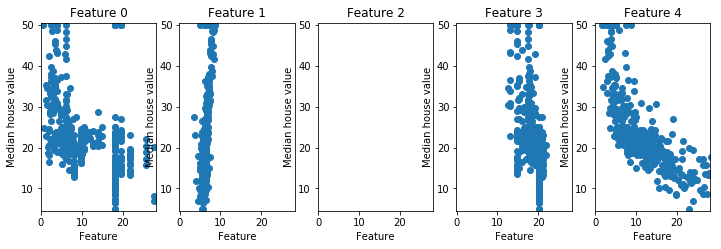

In [7]:
from sklearn.feature_selection import *
fs=SelectKBest(score_func=f_regression,k=5)
X_new=fs.fit_transform(X_train,y_train)
print(zip(fs.get_support(),boston.feature_names))

x_min, x_max = X_new[:,0].min() - .5, X_new[:, 0].max() + .5
y_min, y_max = y_train.min() - .5, y_train.max() + .5
#fig=plt.figure()
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Two subplots, unpack the axes array immediately
fig, axes = plt.subplots(1,5)
fig.set_size_inches(12,12)

for i in range(5):
    axes[i].set_aspect('equal')
    axes[i].set_title('Feature ' + str(i))
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Median house value')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_new[:,i],y_train)


Normalize data

In [8]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
#scalerX = StandardScaler().fit(X_train)
#scalery = StandardScaler().fit(y_train)

#X_train = scalerX.transform(X_train)
#y_train = StandardScaler().fit_transform((y_train)
X_test = StandardScaler().fit_transform(X_test)
#y_test = StandardScaler().fit_transform(y_test)

print(np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train))


10.190454845432923 -4.6670204084548 2.4732713452985016e-15 50.0 5.0 22.923746701846962


Start with a lineal model, SGDRegressor, that tries to find the hyperplane that minimizes a certain loss function (typically, the sum of squared distances from each instance to the hyperplane). It uses Stochastic Gradient Descent to find the minimum. 

In [9]:
from sklearn.model_selection import *
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

In [10]:
from sklearn import linear_model
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None,  random_state=42, shuffle=False)
print(clf_sgd)
train_and_evaluate(clf_sgd,X_train,y_train)
print(clf_sgd.coef_)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=False, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)
Coefficient of determination on training set: 0.740632133452297
Average coefficient of determination using 5-fold crossvalidation: 0.6931114093478168
[-0.6947377   0.64941024 -0.54595457  1.01728355 -0.4985859   3.41885039
 -0.42962785 -1.92785732  0.75328965 -0.45608363 -1.85006403  0.64920902
 -3.44138599]


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset

In [11]:
clf_sgd1 = linear_model.SGDRegressor(loss='squared_loss', penalty='l2',  random_state=42)
train_and_evaluate(clf_sgd1,X_train,y_train)

Coefficient of determination on training set: 0.7415486386317973
Average coefficient of determination using 5-fold crossvalidation: 0.6917292924609744


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset

In [12]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty='l1',  random_state=42)
train_and_evaluate(clf_sgd2,X_train,y_train)

Coefficient of determination on training set: 0.7415464771571667
Average coefficient of determination using 5-fold crossvalidation: 0.6917228857570219


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset

In [13]:
clf_sgd3 = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet',  random_state=42)
train_and_evaluate(clf_sgd3,X_train,y_train)

Coefficient of determination on training set: 0.7415483150079363
Average coefficient of determination using 5-fold crossvalidation: 0.69172833166923


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset

Ridge regression

In [14]:
clf_ridge = linear_model.Ridge()
train_and_evaluate(clf_ridge,X_train,y_train)

Coefficient of determination on training set: 0.7550372084211934
Average coefficient of determination using 5-fold crossvalidation: 0.7139963033343091


SVR

In [15]:
from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,X_train,y_train)

Coefficient of determination on training set: 0.7135291159392312
Average coefficient of determination using 5-fold crossvalidation: 0.7027529505028278


In [16]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,X_train,y_train)

Coefficient of determination on training set: 0.7121877457964245
Average coefficient of determination using 5-fold crossvalidation: 0.623857342879616


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packa

In [17]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,X_train,y_train)

Coefficient of determination on training set: 0.6856910412232917


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packa

Average coefficient of determination using 5-fold crossvalidation: 0.6353585557452655


In [18]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,X_train,y_train)

/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Coefficient of determination on training set: 0.5234573253378927


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Average coefficient of determination using 5-fold crossvalidation: 0.40292516566309916


/home/christan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Finally, let's try again Random Forests, in their Extra Trees, and Regression version

In [19]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,X_train,y_train)

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.8676518071966253


In [20]:
print(clf_et.feature_importances_,boston.feature_names)

[0.03087244 0.00329424 0.02960024 0.02154454 0.02416363 0.35546352
 0.01996826 0.03911897 0.0211915  0.0503617  0.10566496 0.01744104
 0.28131495] ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Finally, evaluate our classifiers on the testing set

In [21]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True, show_r2_score=False):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
        
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
    if show_r2_score:
        print("Coefficient of determination:{0:.3f}".format(metrics.r2_score(y,y_pred)),"\n")

        
measure_performance(X_test,y_test,clf_et, show_accuracy=False, show_classification_report=False,show_confusion_matrix=False, show_r2_score=True)



Coefficient of determination:0.745 

